In [2]:
import numpy as np
import cv2
import skimage
import matplotlib

from skimage import color
from skimage import io

img = cv2.imread('image.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

def rotate_image(img,angle):
    rows,cols = img.shape[:2]
    M=cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    dst=cv2.warpAffine(img,M,(cols,rows))
    
    return dst, M


In [3]:
#границы и угол

edges = cv2.Canny(img,50,10)

lines = cv2.HoughLines(edges,1,np.pi/180,200)

for rho,theta in lines[0]:
   
    a = np.cos(theta)
    b = np.sin(theta)
    
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    print(np.cos(theta))
    
    angle = np.arccos(np.cos(theta))*180/np.pi
    
    print(angle)


0.0174524
89.0000013383


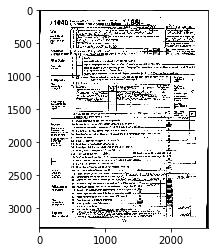

In [5]:
#поворачиваем и выводим картинку
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(img_rot,_)= rotate_image(img, angle-90)



plt.imshow(img_rot)
plt.show()